In [31]:
import pandas as pd 
import numpy as np 
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree
from sklearn.linear_model import LogisticRegression

In [2]:
data = pd.read_csv(r"C:\Users\jonat\Downloads\CleanedFireIncidentData (1).csv")
data

,Unnamed: 0,Borough,Borough num,Time,Time num,Alarm Source,Alarm Source num,Incident Classification,Incident Classification num,Dispatch Response Time,Incident Response Time,Incident Travel Time,Engines Assigned,Ladders Assigned,Other Units Assigned,Valid Response Time
0,0,RICHMOND / STATEN ISLAND,0.864650,10 PM - 2 AM,0.842553,Phone,0.957787,NonMedical Emergencies,0.951872,40,397,357,1.0,1.0,0.0,1
1,1,BRONX,0.829616,10 PM - 2 AM,0.842423,PD Link/Medical,0.687040,Medical MFAs,0.879852,10,260,250,1.0,0.0,0.0,1
2,2,BROOKLYN,0.860628,10 PM - 2 AM,0.842423,PD Link/Medical,0.687040,Medical Emergencies,0.695660,7,146,139,1.0,0.0,0.0,1
3,3,QUEENS,0.850763,10 PM - 2 AM,0.842553,Phone,0.957787,NonMedical MFAs,0.955968,52,327,275,3.0,2.0,1.0,1
4,4,QUEENS,0.850645,10 PM - 2 AM,0.842616,Private Fire Alarm,0.985807,NonMedical Emergencies,0.951918,112,391,279,1.0,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9861251,10275083,MANHATTAN,0.803480,10 PM - 2 AM,0.842483,EMS,0.868442,Medical Emergencies,0.695678,8,263,254,1.0,0.0,0.0,0
9861252,10275086,BROOKLYN,0.860588,10 PM - 2 AM,0.842553,ERS,0.945524,NonMedical MFAs,0.955968,5,210,205,1.0,0.0,0.0,1
9861253,10275088,BROOKLYN,0.860638,10 PM - 2 AM,0.842786,EMS,0.869062,Medical Emergencies,0.695647,15,258,243,1.0,0.0,0.0,1
9861254,10275089,BROOKLYN,0.860628,10 PM - 2 AM,0.842547,PHONE,0.955177,NonStructural Fires,0.927389,22,303,281,1.0,0.0,0.0,1


In [3]:
data.columns

Index(['Unnamed: 0', 'Borough', 'Borough num', 'Time', 'Time num',
       'Alarm Source', 'Alarm Source num', 'Incident Classification',
       'Incident Classification num', 'Dispatch Response Time',
       'Incident Response Time', 'Incident Travel Time', 'Engines Assigned',
       'Ladders Assigned', 'Other Units Assigned', 'Valid Response Time'],
      dtype='object')

In [4]:
# data[['Dispatch Response Time',
#      'Incident Response Time', 'Incident Travel Time']] = data[['Dispatch Response Time',
#       'Incident Response Time', 'Incident Travel Time']].astype(int)

data['Dispatch Response Time'] = data['Dispatch Response Time'].str.replace(',', '').astype(int)

In [5]:
data.dtypes

Unnamed: 0                       int64
Borough                         object
Borough num                    float64
Time                            object
Time num                       float64
Alarm Source                    object
Alarm Source num               float64
Incident Classification         object
Incident Classification num    float64
Dispatch Response Time           int32
Incident Response Time          object
Incident Travel Time            object
Engines Assigned               float64
Ladders Assigned               float64
Other Units Assigned           float64
Valid Response Time              int64
dtype: object

In [6]:
data_columns = data[['Borough num', 'Alarm Source num', 
       'Incident Classification num', 'Engines Assigned',
       'Ladders Assigned', 'Other Units Assigned', 'Time num', 'Dispatch Response Time']]

X = data_columns
y = data['Valid Response Time']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 42)

In [8]:
# Decision Tree Classification Model

dt = DecisionTreeClassifier(random_state=42)

In [9]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [10]:
y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy}" )

Decision Tree Accuracy: 0.8562567055325587


In [11]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[  79886  241089]
 [  42409 1608868]]


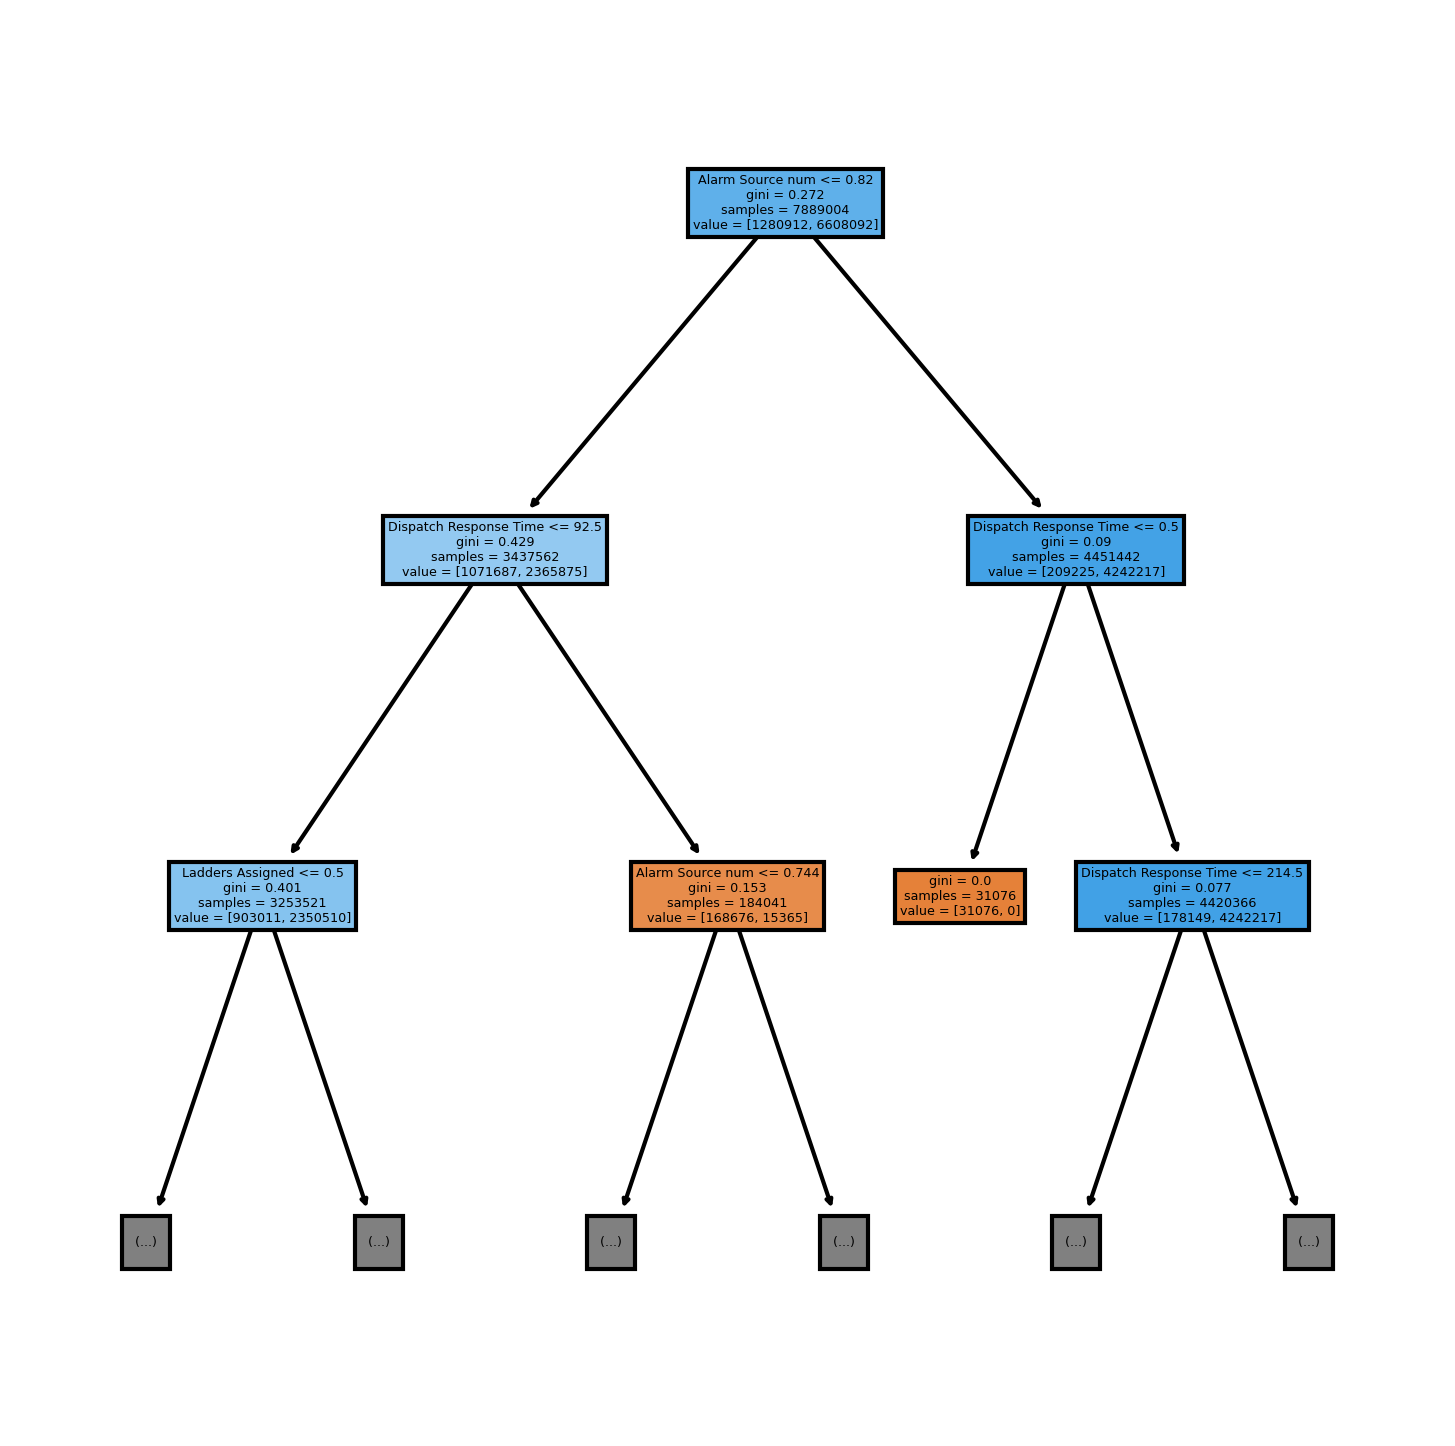

In [12]:
# Plot out tree
# Use feature-importance to test variables
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (6,6), dpi = 300)
tree.plot_tree(dt, max_depth = 2, feature_names = X.columns, filled = True)
plt.show()

In [13]:
fi = dt.feature_importances_
fi = pd.Series(data = fi, index = X.columns)
fi.sort_values(ascending = False, inplace = True)

C:\Users\jonat\AppData\Local\Temp\ipykernel_43856\3278443058.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

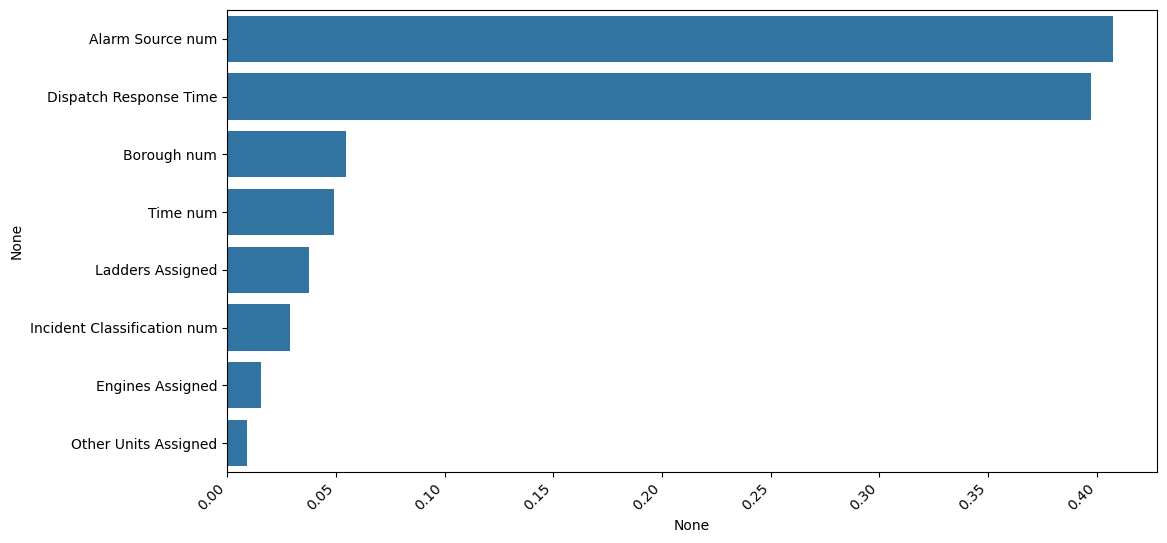

In [14]:
plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi, y = fi.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [15]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators= 10, random_state=42)

In [16]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

In [17]:
y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy}" )

Random Forest Accuracy: 0.8627634805288573


In [18]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[  78197  242778]
 [  27887 1623390]]


C:\Users\jonat\AppData\Local\Temp\ipykernel_43856\2396124700.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

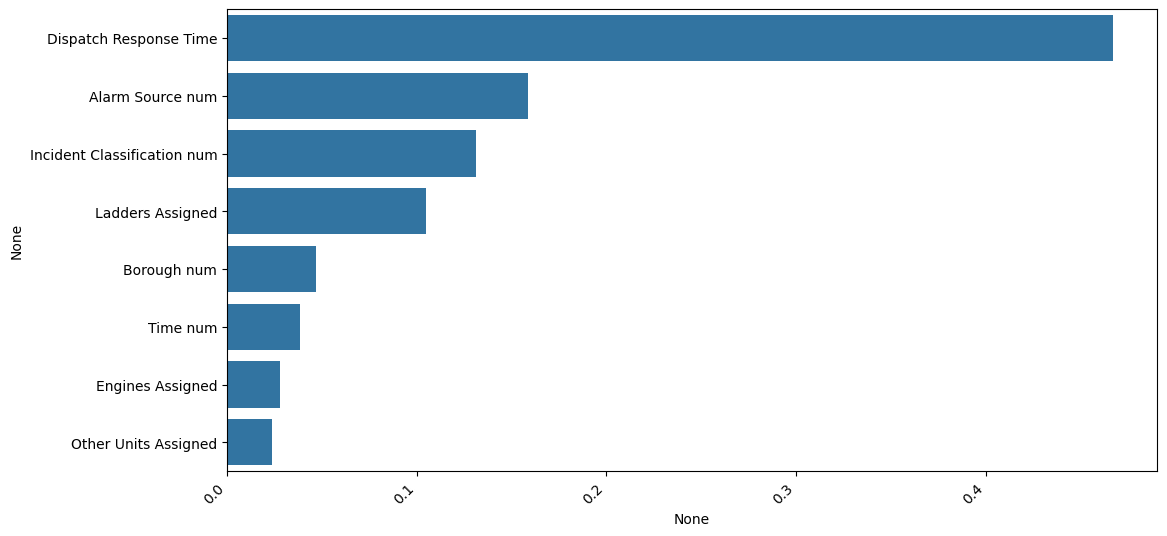

In [37]:
fi = rf.feature_importances_
fi = pd.Series(data = fi, index = X.columns)
fi.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi, y = fi.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [19]:
# Gradient-Boosting Classification

gb = GradientBoostingClassifier(n_estimators=10, learning_rate= 0.05, random_state=42, max_features=6)

In [20]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.05, max_features=6, n_estimators=10,
                           random_state=42)

In [21]:
y_pred = gb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient-Boosting Accuracy: {accuracy}')

Gradient-Boosting Accuracy: 0.8372545699028319


In [22]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[      0  320975]
 [      0 1651277]]


C:\Users\jonat\AppData\Local\Temp\ipykernel_43856\3238527256.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

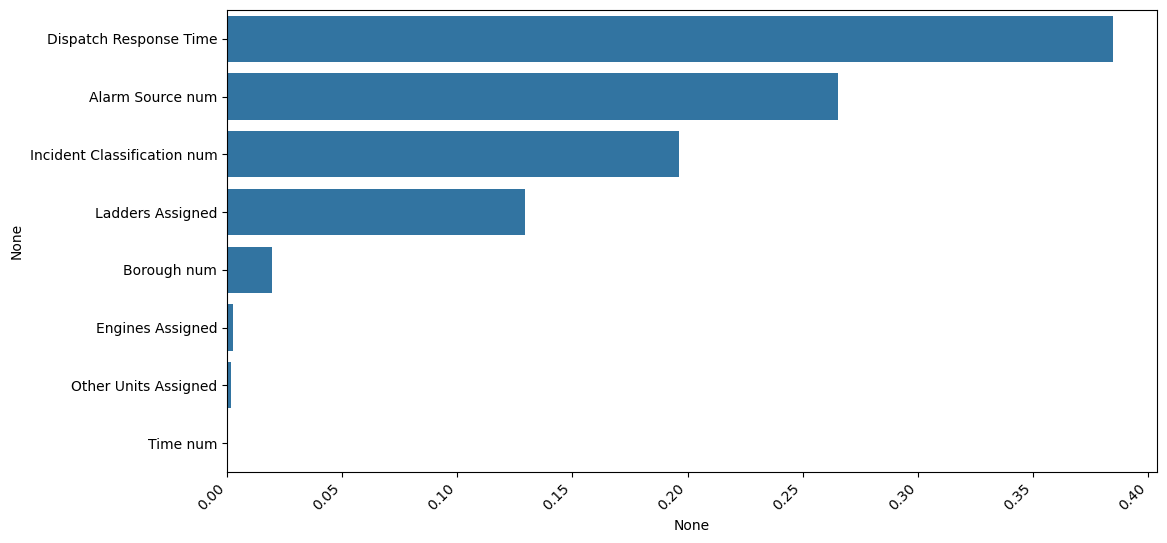

In [38]:
fi = gb.feature_importances_
fi = pd.Series(data = fi, index = X.columns)
fi.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi, y = fi.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [23]:
#ADA Boost Classifier

ada = AdaBoostClassifier(random_state=42, n_estimators=10)

In [24]:
ada.fit(X_train, y_train)

c:\Users\jonat\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=10, random_state=42)

In [25]:
y_pred = ada.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'ADA Boost Accuracy: {accuracy}')

ADA Boost Accuracy: 0.8595691625613765


In [26]:
conf_matrix = confusion_matrix(y_test, y_pred)

print(conf_matrix)

[[  54334  266641]
 [  10324 1640953]]


C:\Users\jonat\AppData\Local\Temp\ipykernel_43856\3258027612.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")


<function matplotlib.pyplot.show(close=None, block=None)>

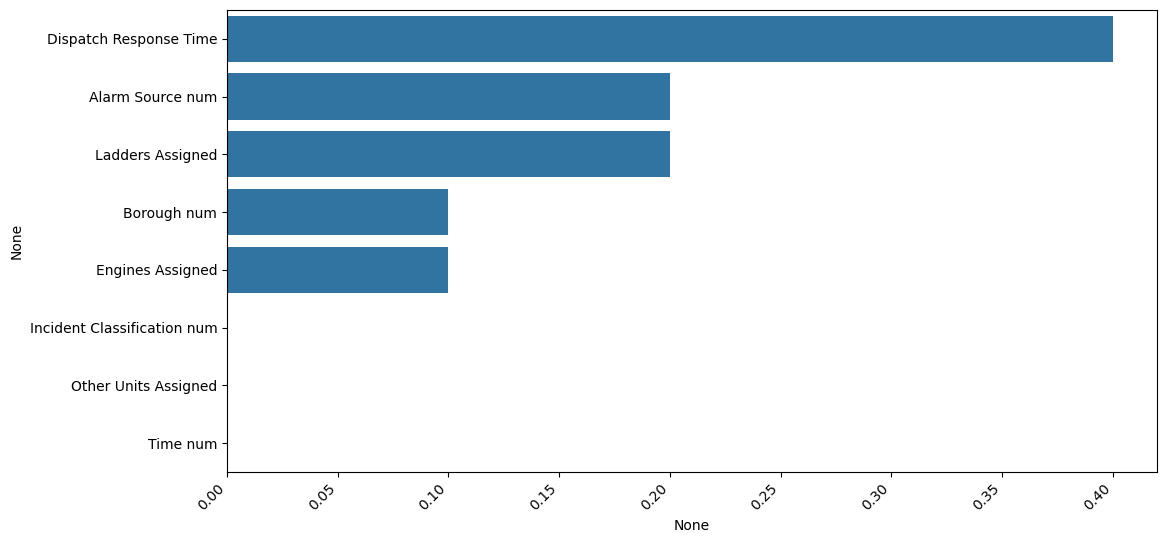

In [39]:
fi = ada.feature_importances_
fi = pd.Series(data = fi, index = X.columns)
fi.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi, y = fi.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

In [27]:
# KNeighbors Classifier

# knn = KNeighborsClassifier(n_neighbors= 2)

In [28]:
# knn.fit(X_train, y_train)

In [29]:
## y_pred = knn.predict(X_test)

# accuracy = accuracy_score(y_test, y_pred)
# print(f'KNN Classifier Accuracy: {accuracy}')


In [30]:
# conf_matrix = confusion_matrix(y_test, y_pred)

# print(conf_matrix)

In [32]:
# Logistic Regression

lg = LogisticRegression()

In [33]:
lg.fit(X_train, y_train)

c:\Users\jonat\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [34]:
y_pred = lg.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy}")

Logistic Regression Accuracy: 0.8596061760870315


In [35]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[  46977  273998]
 [   2894 1648383]]


In [36]:
fi = lg.feature_importances_
fi = pd.Series(data = fi, index = X.columns)
fi.sort_values(ascending = False, inplace = True)

plt.figure(figsize = (12,6))
chart = sns.barplot(x = fi, y = fi.index)
chart.set_xticklabels(chart.get_xticklabels(), rotation = 45, horizontalalignment = "right")
plt.show

AttributeError: 'LogisticRegression' object has no attribute 'feature_importances_'